# Introduction

## Overview 
This month's Kaggle challenge is centered around a critical health issue: predicting obesity risk levels in individuals. Obesity is directly linked to numerous health complications, particularly cardiovascular diseases. 

## Goal
The goal is to employ machine learning techniques to predict different obesity levels based on various factors, thereby contributing to broader health analytics and preventive medicine efforts.

## Evaluation Metrics
The effectiveness of the submitted models will be evaluated using the accuracy score, a common metric for classification problems

## Dataset Description
The dataset provided for this competition has been synthetically generated, mimicking the distribution of a real-world dataset related to obesity and cardiovascular disease risks. While the dataset mirrors real-world scenarios, it has been slightly altered for the competition. The dataset includes demographic information, dietary habits, and physical activity levels, collected from a diverse group of individuals across Mexico, Peru, and Colombia.

The attributes related with eating habits are: Frequent consumption of high caloric food (FAVC), Frequency of consumption of vegetables (FCVC), Number of main meals (NCP), Consumption of food between meals (CAEC), Consumption of water daily (CH20), and Consumption of alcohol (CALC). The attributes related with the physical condition are: Calories consumption monitoring (SCC), Physical activity frequency (FAF), Time using technology devices (TUE), Transportation used (MTRANS).

The target variable, NObeyesdad, represents the obesity level classified into 7 classes: Insufficient_Weight, Normal_Weight, Overweight_Level_I, Overweight_Level_II, Obesity_Type_I, Obesity_Type_II, Obesity_Type_III.


**train.csv**: the training dataset includes all features and the target variable. This data will be used to train the model.

**test.csv**: the test dataset includes all features and excludes the target variable. This data will be used to evaluate the accuracy of the model for the competition. 


## Note: this file only contains the EDA


# Libraries and Helpers

In [18]:
# Python file with functions to build charts 
%run Charts_for_EDA.ipynb

import pandas as pd
import numpy as np
from scipy.stats import randint, boxcox, yeojohnson

# Data Preparation

## Load Data

In [3]:
df_train = pd.read_csv("/Users/gracebarringer/Machine Learning Projects/Kaggle/Obesity Risk - Multi-Class/data/train.csv")
df_test = pd.read_csv("/Users/gracebarringer/Machine Learning Projects/Kaggle/Obesity Risk - Multi-Class/data/test.csv")

In [4]:
#Creating Copies
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()

## Summarize Data

In [5]:
# Understanding what the data looks like at first glance 
display(df_train_copy.head())
display(df_test_copy.head())

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


Insights & Observations
- id column is unique identifier so will not be used as a predictor 
- Columns are in the same order in train and test (minus the target variable in test) 
- At first glance, columns look to be in the same format across both datasets

In [9]:
# Identifying categorical variables for encoding 
display(df_train_copy.dtypes.to_frame().T)
display(df_test_copy.dtypes.to_frame().T)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,int64,object,float64,float64,float64,object,object,float64,float64,object,object,float64,object,float64,float64,object,object,object


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,int64,object,float64,float64,float64,object,object,float64,float64,object,object,float64,object,float64,float64,object,object


Insights & Observations
- Data has both continuous and categorical features 
- Categorical features include: ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
- Categorical features will need to be encoded - since there are not a ton of classes in each we can use one hot encoding
- Feature data types in training and testing set are the same

In [7]:
# Brief statistical summary  
display(df_train_copy.describe())
display(df_test_copy.describe())

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000
mean,27677.500000,23.952740,1.698934,87.384504,2.442898,2.750610,2.032044,0.974532,0.611033
std,3995.408198,5.799814,0.088761,26.111819,0.531606,0.710927,0.611230,0.840361,0.608005
min,20758.000000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,24217.750000,20.000000,1.631662,65.000000,2.000000,3.000000,1.771781,0.001086,0.000000
50%,27677.500000,22.906342,1.700000,83.952968,2.358087,3.000000,2.000000,1.000000,0.552498
75%,31137.250000,26.000000,1.760710,111.157811,3.000000,3.000000,2.552388,1.571865,1.000000
max,34597.000000,61.000000,1.980000,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


Insights & Observations
- Means can be quite different so might need to scale some features depending on model selection 
- Height looks like it's in meters 
- Weight looks like it's in kg

## Initial Validation 

In [10]:
# Checking for duplicates 
duplicate_count_train = df_train_copy.duplicated().sum()
duplicate_count_test = df_test_copy.duplicated().sum()

print('Train: ', duplicate_count_train)
print('Test: ', duplicate_count_test)

Train:  0
Test:  0


Insights & Observations
- No duplicates found in either dataset 

In [13]:
# Checking for missing values 
display(df_train_copy.isnull().sum().to_frame().T)
display(df_test_copy.isnull().sum().to_frame().T)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


 Insights & Observations
 - No null values in either dataset

In [17]:
# Checking for categorical features

df_train_copy_unique_values_dict = {}
df_test_copy_unique_values_dict = {}

for data in [df_train_copy,df_test_copy]:
    for column in data.columns:
        if df_train_copy[column].dtype == 'O':
            if 'NObeyesdad' in data.columns.tolist():
                df_train_copy_unique_values_dict[column] = data[column].nunique()
            else:
                df_test_copy_unique_values_dict[column] = data[column].nunique()
                
df_train_copy_unique_values_dict['Dataset'] = 'Train'
df_test_copy_unique_values_dict['Dataset'] = 'Test'

df_combined = pd.DataFrame([df_train_copy_unique_values_dict, df_test_copy_unique_values_dict])

df_combined

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad,Dataset
0,2,2,2,4,2,2,3,5,7.0,Train
1,2,2,2,4,2,2,4,5,NaN,Test


Insights & Observations
- CALC has a different number of categories between the training and testing datasets. We need to investigate this further. 

In [18]:
print('Unique CALC values training: ', df_train_copy['CALC'].unique().tolist())
print('Unique CALC values testing: ', df_test_copy['CALC'].unique().tolist())

Unique CALC values training:  ['Sometimes', 'no', 'Frequently']
Unique CALC values testing:  ['Sometimes', 'no', 'Frequently', 'Always']


Insights & Observations
- 'Always' is missing from CALC categories in the training dataset - when encoding categorical variables, we will need to add a dummy column for CALC in the training data

In [10]:
# Splitting Categorical vs. Continuous Variables
cat_vars = df_train_copy.select_dtypes(include = 'object').columns.tolist()
target_var = 'NObeyesdad'
cont_vars = df_train_copy.select_dtypes(exclude = 'object').columns.tolist()
cont_vars.remove('id')
# cat_vars.remove('NObeyesdad')

# Data Exploration

## Univariate Analysis

### Continuous Variables

/var/folders/q1/01n67gwn27z65jnn2t76vm6w0000gn/T/ipykernel_22911/2648317903.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], ax=ax_hist, kde=True, color = colour_palette[0])
/var/folders/q1/01n67gwn27z65jnn2t76vm6w0000gn/T/ipykernel_22911/2648317903.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750

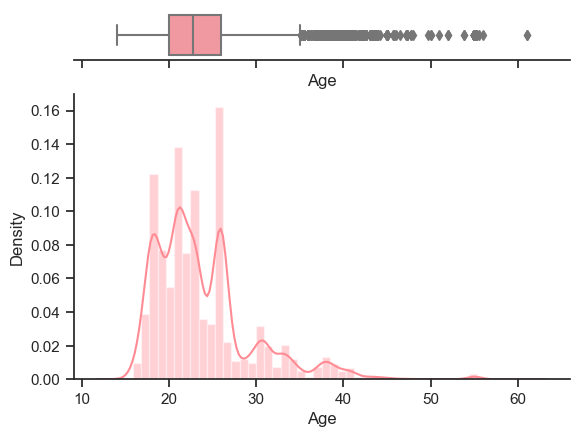

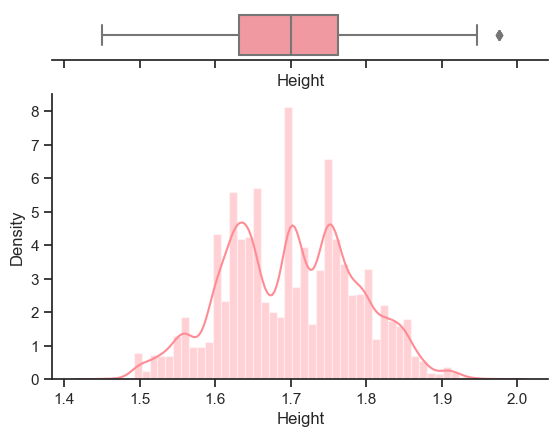

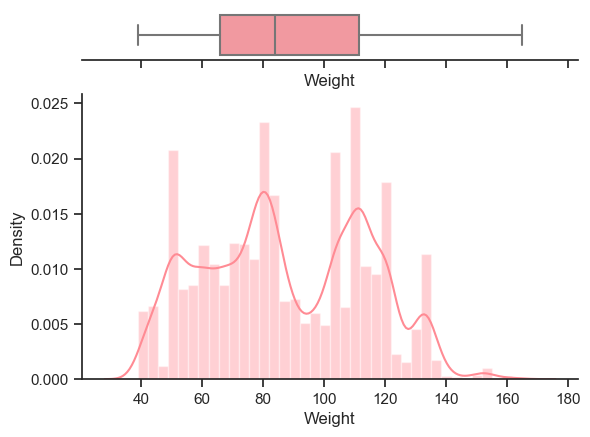

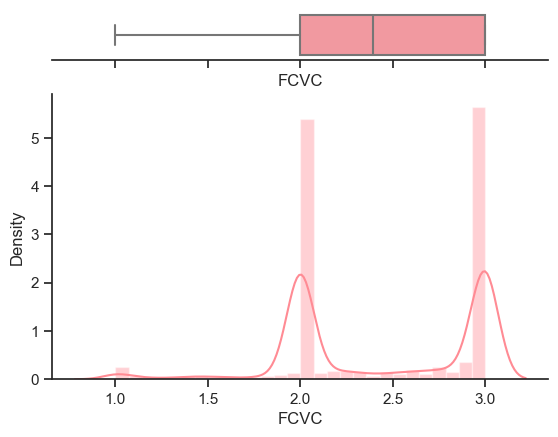

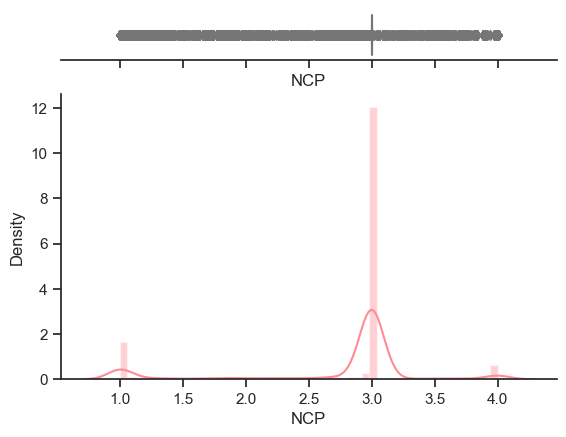

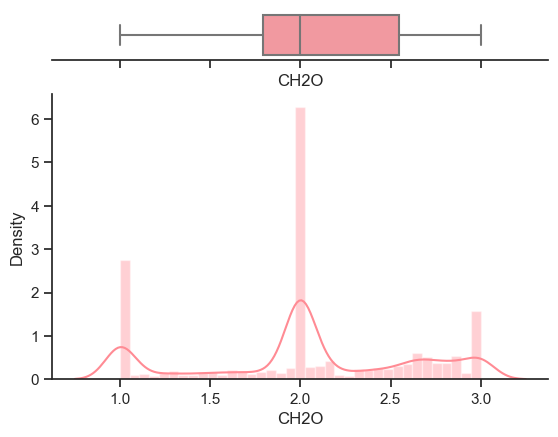

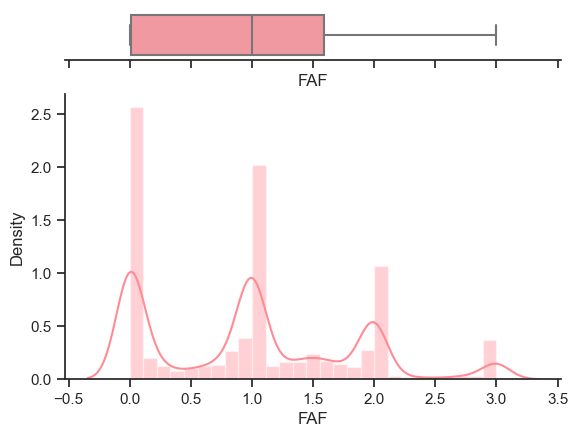

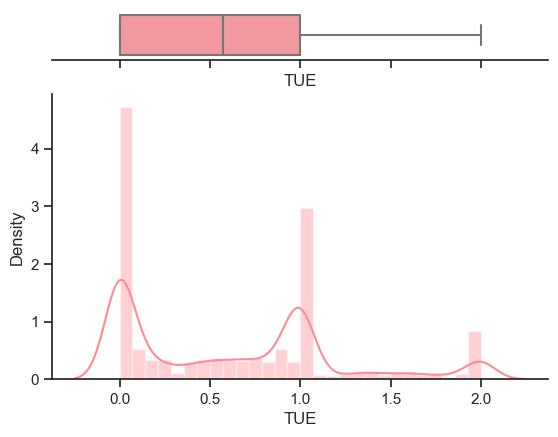

In [11]:
for i in cont_vars:
    cont_dist(df_train_copy[cont_vars], i)

Insights & Observations 
- Age is right-skewed -  will perform transformation to make more normally distributed 
- Height is fairly normally distributed 
- Weight is slightly left-skewed - might need to perform transformation to make more normally distributed 
- FCVC has two large spikes - might add some binning 
- NCP has one large spike - might need scaling or binning 
- CH2O has one large spike - might need scaling or binning 
- FAF and TUE follow a similar form - might need scaling or binning

### Categorical Variables 

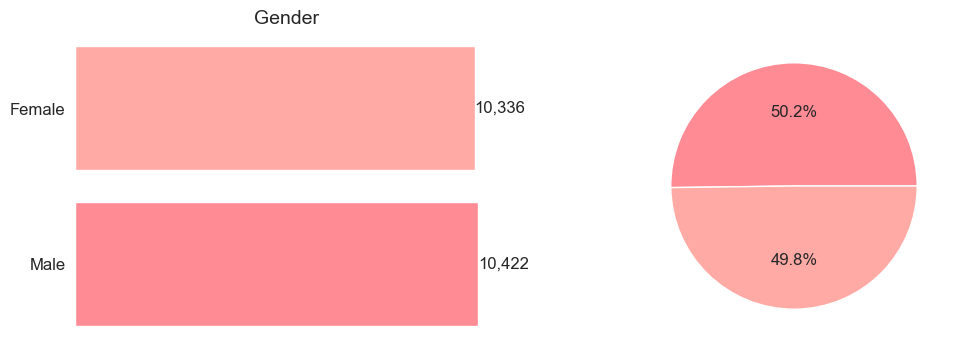

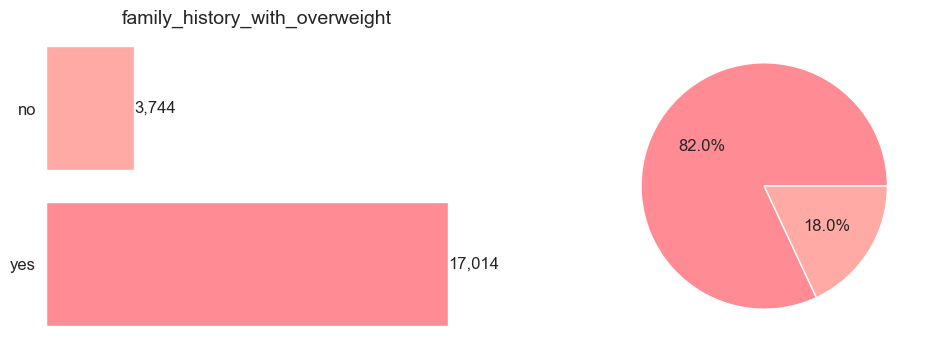

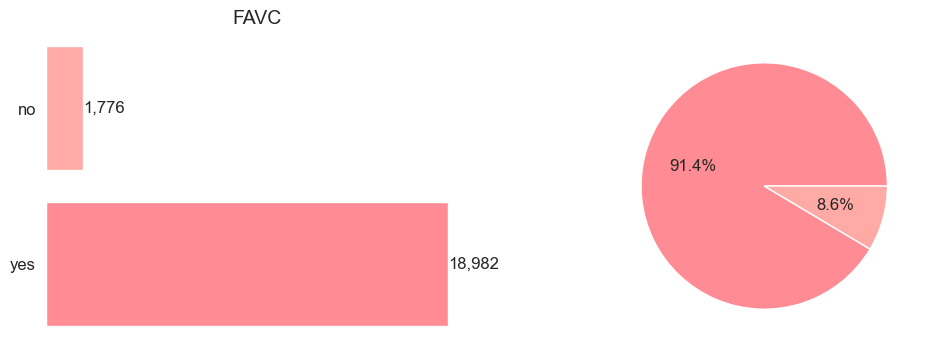

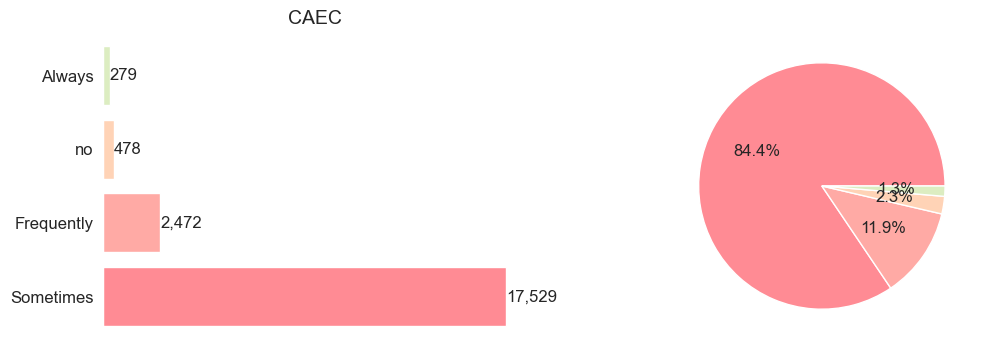

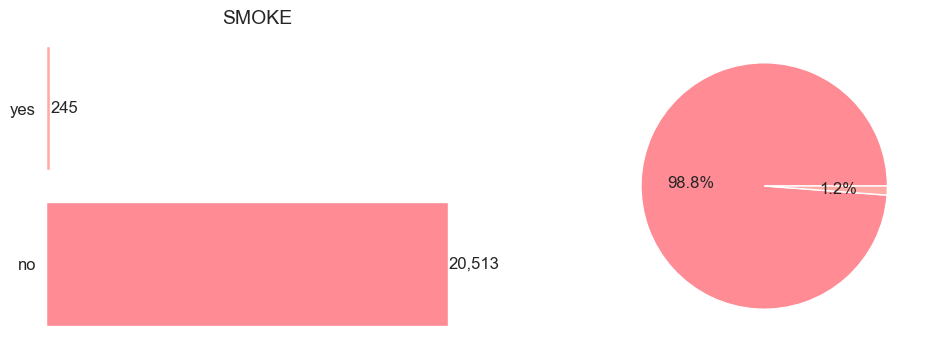

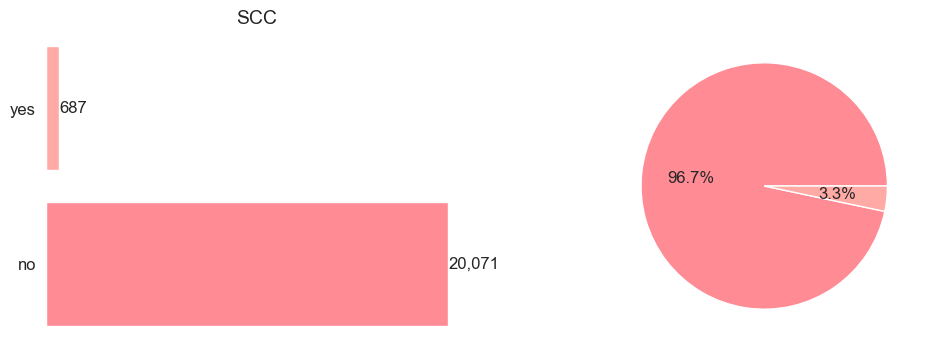

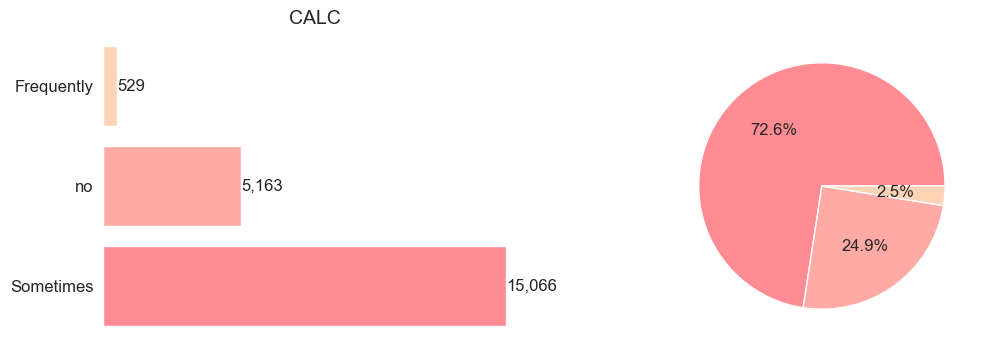

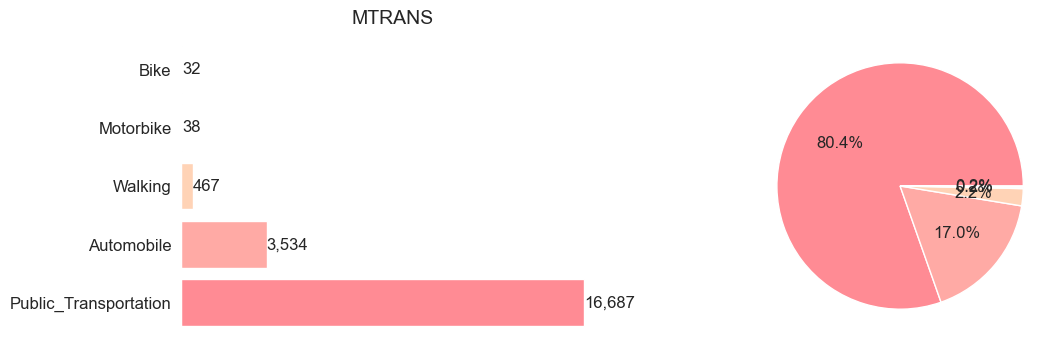

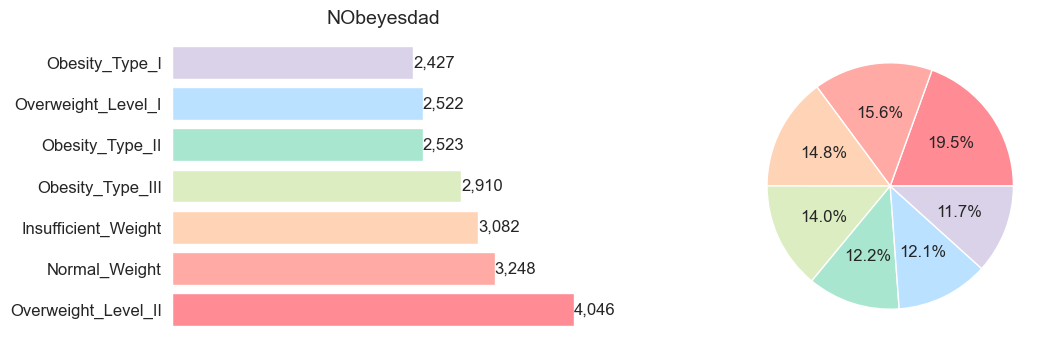

In [8]:
for i in cat_vars:
    cat_dist(df_train_copy, i)

Insights & Observations 
- Only 1.2% of people said they smoke - might make sense to remove as it does not really tell us anything 
- Only 3.3% of people say they monitor their calories - might make sense to remove as it does not really tell us anything 
- The target variable 'NObeyesdad' is relatively balanced across classes - likely won't lead towards class bias

## Bivariate Analysis

### Continuous Variables and Target

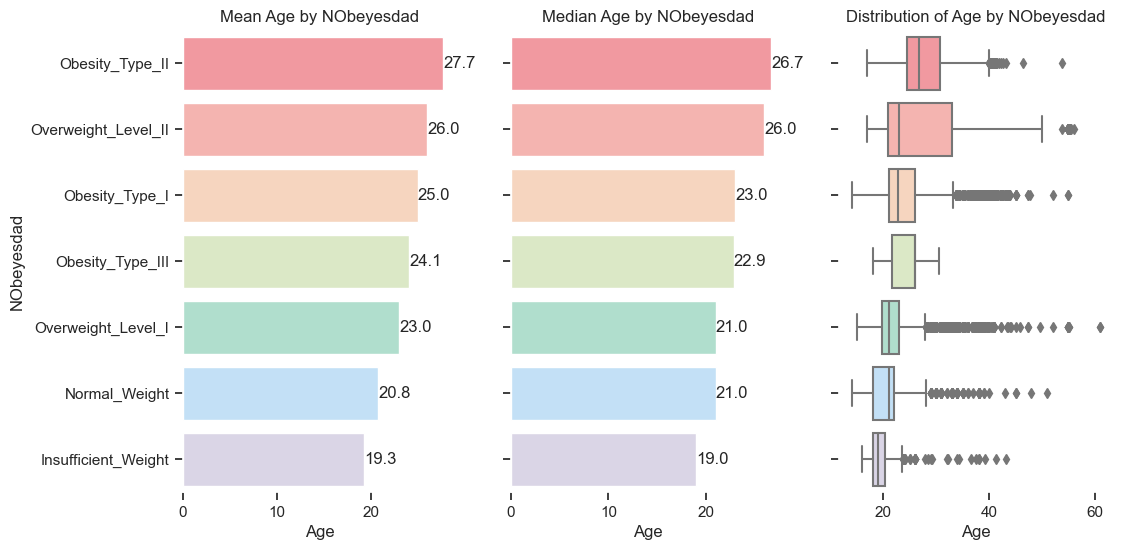

In [12]:
cat_cont_dist(df_train_copy, 'NObeyesdad', 'Age')

Insights & Observations
- People who are normal weight or under weight tend to be younger - could be due to factors such as changes in metabolism, health conditions that become more prevalent with age, social media 
- Moving towards higher weight classes, the age distribution widens, especially for "Overweight" and "Obesity" categories, indicating a broader age range among people in these categories

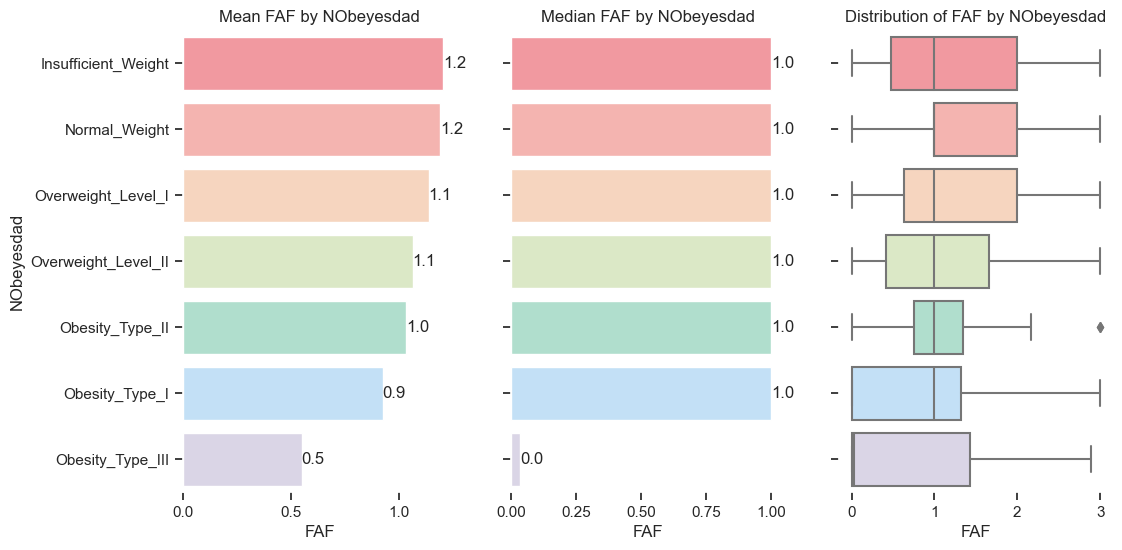

In [13]:
cat_cont_dist(df_train_copy, 'NObeyesdad', 'FAF')

Insights & Observations
- The mean frequency of physical activity tends to decrease as weight class increases, which is expected
- The median FAF appears consitent across most weight classes except for Obesity_Type_III, where it drops significantly which indicates a notable decrease in FAF among people in this class
- Distribution of FAF indicates variability within each weight category. 

### Categorical Variables and Target

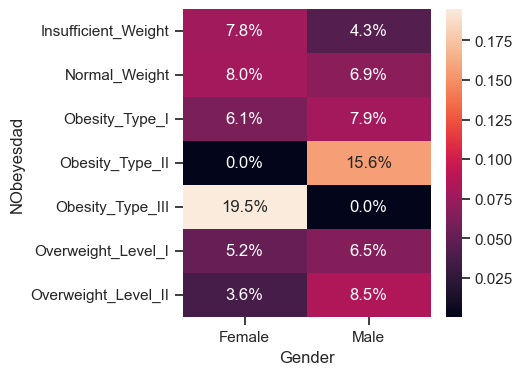

In [14]:
cat_heat_map(df_train_copy, 'NObeyesdad', 'Gender')

Insights & Observations
- There are quite significant gender differences in the prevalence of various weight classes (especially at the ends of the spectrum)
- This raises questions about the biological, societal, and healthcare-related factors that contribute to the disparities
- Significantly more males tend to fall into the Obesity_Type_II class than females (0% - could this be use to data sampling or societal/health-related factors?)
- Conversely, significantly more femails tend to fall into the Obesity_Type_III class than males (0% - could this be use to data sampling or societal/health-related factors?)

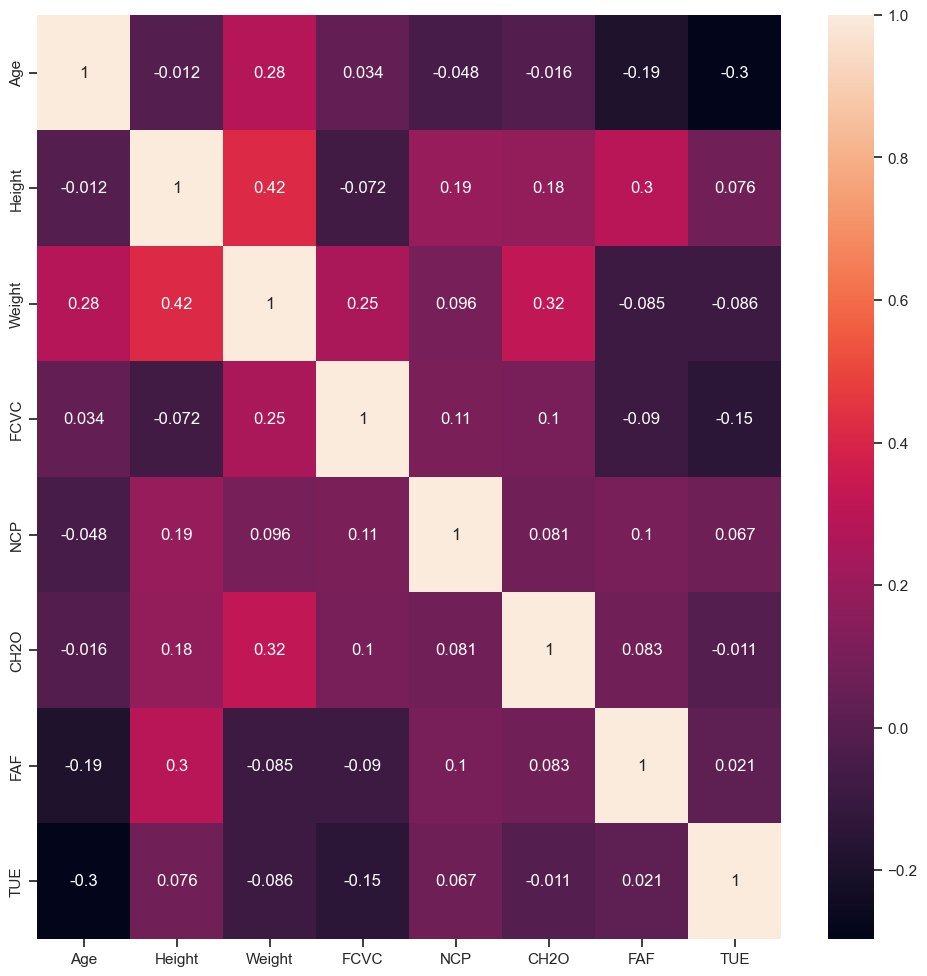

In [15]:
corr_heat_map(df_train_copy[cont_vars])

# Data Transformation Investigation

## Addressing Skewed Distribution 

In [16]:
# Find the skew of continuous variables
df_train_copy[cont_vars].skew()

Age       1.586252
Height    0.015803
Weight    0.093187
FCVC     -0.356611
NCP      -1.562253
CH2O     -0.212506
FAF       0.505726
TUE       0.670411
dtype: float64

Insights & Observations
- Age seems the be the primary one to address

In [19]:
# Transforming Age - Deciding on the best transformation method
df_train_copy['Age_log'] = np.log(df_train_copy['Age'] + 1)  # Adding 1 to avoid log(0)
df_train_copy['Age_sqrt'] = np.sqrt(df_train_copy['Age'])
df_train_copy['Age_bc'], fitted_lambda = boxcox(df_train_copy['Age'])
df_train_copy['Age_yj'], fitted_lambda = yeojohnson(df_train_copy['Age'])


print("Age skew: ", df_train_copy['Age'].skew())
print("Age_log skew: ", df_train_copy['Age_log'].skew())
print("Age_sqrt skew: ", df_train_copy['Age_sqrt'].skew())
print("Age_bc skew: ", df_train_copy['Age_bc'].skew())
print("Age_yj skew: ", df_train_copy['Age_yj'].skew())


Age skew:  1.5862517094133515
Age_log skew:  0.8566806845746754
Age_sqrt skew:  1.1774467327979958
Age_bc skew:  0.06144600034240206
Age_yj skew:  0.06386822275886551


Insights & Observations
- Boxbox leads to the lowest skew value - use this transformation in data preprocessing